In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

In [2]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [3]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [4]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw())

┌───┐     ┌─┐   
  Y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  X: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
B: 1/═══════════╩══╬═
                0  ║ 
A: 1/══════════════╩═
                   0

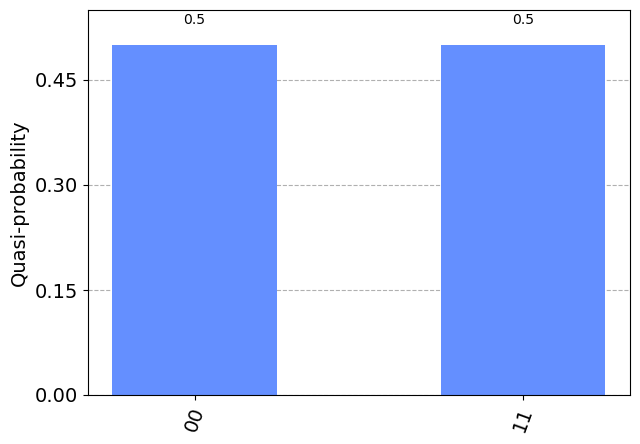

In [5]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))